# Top Models Enron Emails

[Enron Email Dataset](https://www.cs.cmu.edu/~enron/)
This project is based on the enron data found above. These are emails that contain a paragraph of words. There are 5171 documents.

 ### Project 1 : Clustering emails using Gaussian Mixture Models
 
 

### 1 : First I construct a list of processed documents

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import re
import string
import codecs

def makeWordList(path):
    
    with codecs.open(path, "r", encoding='utf-8', errors='ignore') as f:
        corpus_text = f.read()

    for c in string.punctuation:
        corpus_text = corpus_text.replace(c, "")  # -- (1)
    
    text = re.sub(r'\S*\d\S*', '', corpus_text) # -- (2)
    text = re.sub(r'[^\w\s]', '', text)         # -- (3)
    
    text = text.lower().split()           # -- (4)         
    
    li = []
    for token in text:
        li.append(token)

    return " ".join(li)

In [33]:
import os
#os.chdir('/Users/ericacollins/')
documents = []

import glob
for file in glob.glob('enron/*.txt'):
    document = makeWordList(file)
    documents.append(document)
    
print(documents[1])

subject re additional responsibility congratulations on this additional responsibility i will be more than happy to help support your new role in any way possible my apologies again for having to leave the staff meeting early yesterday susan enron north america corp from sally beck pm to mary solmonson hou ect ect brent a price hou ect ect bob shults hou ect ect sheila glover hou ect ect cc susan harrison hou ect ect subject additional responsibility two of you had to leave the staff meeting before this final discussion point and three of you were not in attendance so i wanted to send you the attached memo that i distributed at the end of the meeting this memo will be sent by rick causey via notes mail regarding an additional role that i will assume with regard to global operations i shared this in the staff meeting so that you would be the first to know i will still fulfill my role within ena as vp of energy operations i will not be going away this expanded responsibility should creat

### 2 : I then convert these documents in a  Document Matrix

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=50,stop_words="english",max_df=0.8)

X = vectorizer.fit_transform(documents).toarray()
B = vectorizer.fit(documents)
#print(X.vocabulary_)


vocabulary = vectorizer.vocabulary_

#print(vocabulary)

unique_words = list(vocabulary.keys())
#print(len(vocabulary))
print("Number of Unique Words" ,len(unique_words))
print("This matrix contains a list of documents with 1680 words as features. If the word appears in the document a value    will be in that document cell at that word.")

idf = vectorizer.idf_
dict_weights = dict(zip(B.get_feature_names(), idf))
#print(dict(zip(B.get_feature_names(), idf)))

Number of Unique Words 1680
This matrix contains a list of documents with 1680 words as features. If the word appears in the document a value    will be in that document cell at that word.


In [53]:
import operator
sorted_x = sorted(dict_weights.items(), key=operator.itemgetter(1))
sorted_x_reverse = sorted(dict_weights.items(), key=operator.itemgetter(1), reverse = True)
#sorted_x_reverse

### 3 : Perform Gaussian Mixture Model Clustering

In [54]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3,  random_state=95865)
gmm.fit(X)

gmm_cluster_assignments = gmm.predict(X)

#print(X.shape)
#gmm_cluster_assignments
print(type(gmm_cluster_assignments))



<class 'numpy.ndarray'>


In [55]:
m = list(gmm_cluster_assignments)
from collections import Counter

category = Counter(m)

print("Cluster Assignments")
for key, value in category.most_common():
        print(key, value)


Cluster Assignments
1 3945
0 728
2 497


The GMM created 3 clusters. The document amounts for each cluster are listed above.

### 4 : Characterize the clusters

In [38]:
def plot_spam_words_by_cluster(predicted, n_clusters, spam_indices, ham_indices):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Calculate mean TF-IDF features for each cluster
    mean_tfidf_spam = []
    mean_tfidf_ham = []
    for spam in spam_indices:
        mean_tfidf_spam.append([])
    for ham in ham_indices:
        mean_tfidf_ham.append([])
    
    for i in range(n_clusters):
        for j, spam_idx in enumerate(spam_indices):
            mean_tfidf_spam[j].append(X[predicted==i, spam_idx].mean())
        for j, ham_idx in enumerate(ham_indices):
            mean_tfidf_ham[j].append(X[predicted==i, ham_idx].mean())
    
    # Generate plot
    fig, ax = plt.subplots()

    ind = np.arange(n_clusters)    # the x locations for the groups
    width = 0.10         # the width of the bars

    # Plot spam bars
    for i, val in enumerate(mean_tfidf_spam):
        spam_bar = ax.bar(ind - (len(mean_tfidf_spam)-i-1)*width, val, width, color='r', bottom=0)

    # Plot ham bars
    for i, val in enumerate(mean_tfidf_ham):
        ham_bar = ax.bar(ind + (len(mean_tfidf_ham)-i)*width, val, width,
                color='y', bottom=0)

    ax.set_title('Mean TF-IDF Features by Cluster for Spam-Relevant Words')
    ax.set_xticks(ind + width / 2)
    xticklabels = []
    for i in range(n_clusters):
        xticklabels.append('Cluster ' + str(i) + '\n(n=' + str((predicted==i).sum()) + ')')
    ax.set_xticklabels(xticklabels)

    ax.legend((spam_bar[0], ham_bar[0]), ('Spammy words', 'Hammy words'))
    ax.autoscale_view()
    ax.set_ylabel('Mean TF-IDF')
    plt.show()

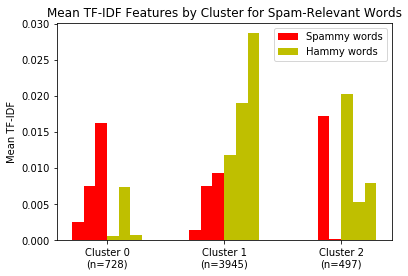

In [45]:
m = sorted(unique_words)

spammy_words = ['click','www','offer']
hammy_words = ['progress','review','meeting']



ham_indices = []
spam_indices = []

#print(m)
#print(vocabulary)


ham_indices = [vocabulary[x] for x in spammy_words]
spam_indices = [vocabulary[x] for x in hammy_words]

#ham_indices
#spam_indices
#print(vocabulary.items())  

n_clusters = 3
###Passing through code
plot_spam_words_by_cluster(gmm_cluster_assignments, n_clusters, spam_indices, ham_indices)


The three main clusters are detailed. It looks like cluster 1 and 2 have hammy words.
Spammy words are mainly in cluster 0.


## 4 : Changing Cluster Size

Here we change the cluster size to 5. We have predifined words that we think would qualify as Spammy and not spammy(Hammy) words. This visual is very subjective to the words we choose.

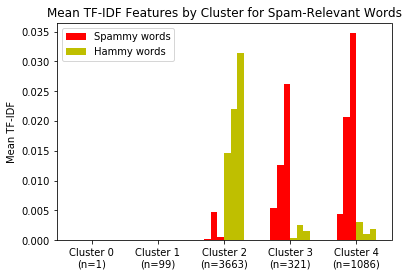

In [47]:
#From my results, it looks like cluster 2 corresponds to spammy words, 
#and cluster 0 corresponds to spammy words

gmm2 = GaussianMixture(n_components=5,  random_state=0)
gmm2.fit(X)

gmm_cluster_assignments2 = gmm2.predict(X)

plot_spam_words_by_cluster(gmm_cluster_assignments2, 5, spam_indices, ham_indices)



It looks like now there are two prominent clusters for spammy words, 3 & 4, and hammy words are in cluster 2

## Project 2: Latent "Purposes" in Mobile Apps


Here we take a list of Android applications as "documents", where "words" are the "permissions" that each app requests. Each app has a set of latent "purposes" (topics); a "purpose" may be a specific task (such as taking photographs and uploading them to the internet), and an application may have a mixture of purposes of varying strength.

Here we want to uncover these purposes from a dataset of Android applications and the permissions they request.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### 1 : Load the data

The [dataset](http://www.mariofrank.net/andrApps/) contains ~180,000 applications from the Android app store, including each app's name, description and permissions requested. For more about Android app permissions, see [this report](http://www.pewinternet.org/2015/11/10/an-analysis-of-android-app-permissions/).

   * Download the data and unzip it into the same folder as this notebook.
   * Rename the CSV file to "android.csv".
   * Run the cells below to load the data into the notebook.

This may take up ~2GB of RAM.

In [58]:
df = pd.read_csv("android.csv", sep=",",  thousands=",")

In [59]:
df["Number of ratings"] = df["Number of ratings"].astype(int) # fix data type
df = df.drop_duplicates(subset=["App"]).reset_index(drop=True)

In [60]:
df.head(n=3)

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S)
0,Google Maps,com.google.android.apps.maps,Travel & Local,"Download the latest release of Google Maps, an...",4.4,1438259,$0.00,"{com.jsdfproductions.ctatrackerpro, com.alk.co...",17.0,8,...,0,0,1,0,0,0,0,0,1,0
1,Snowfall Live Wallpaper,fishnoodle.snowfall_free,Personalization,Snowfall Live Wallpaper: Wintertime on your ho...,4.3,18147,$0.00,"{colfore.wallpaper.snowfree, com.tabsoft.wallp...",0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,Aquarium Live Wallpaper,fishnoodle.aquarium_free,Personalization,A beautiful tropical fish tank live wallpaper!...,4.1,62145,$0.00,"{com.convisual.lwp.fishometerlite, com.accessl...",0.0,0,...,0,0,0,0,0,0,0,0,0,0


### 2 : Convert each app into a "document" 

The code below does the following:

   * Filter out all the columns except the permission columns.
   * Convert this dataframe into a numpy matrix.

There are thus 180295 apps (documents) and 173 permissions (words).

   - `X` is the "document" or "word-frequency" matrix.
   - `permission_columns` contains the words ordered by their column index in X.
   - `app_names` contains the application names ordered by their row index in X.
   - `app_ratings` contains the *number* of application ratings (not the ratings themselves).

In [61]:
permission_columns = list(df.columns[10:])
app_names = list(df["App"])
app_ratings = np.array(df["Number of ratings"])
df_perms = df[permission_columns]
X = df_perms.as_matrix()
#del df # uncomment to free up RAM
#del df_perms # uncomment to free up RAM

In [62]:
X.shape

(180295, 173)

### 3 : Downweight "stop-words"

There are some permissions requested by almost all applications (like "INTERNET"), they are similar to stop-words ("the", "and", etc.) in natural language. We can downweight them by TF-IDF normalization.

   * Used the `TfidfTransformer` class in `scikit-learn` to transform X.

In [63]:
from sklearn.feature_extraction.text import TfidfTransformer

normalized_X = TfidfTransformer().fit_transform(X)

normalized_X.toarray().shape

(180295, 173)

### 4 : Discover 10 "topics" 

   * Used the `LatentDirichletAllocation` class in `scikit-learn` to fit 10 topics to the data.
   * Used 10 max iterations, set `n_jobs=-1` to use all cores on  machine.


In [64]:
%%time
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10,max_iter = 10 ,n_jobs=-1)

output = lda.fit(normalized_X) 

/Users/ericacollins/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


CPU times: user 29.8 s, sys: 1.85 s, total: 31.6 s
Wall time: 3min 16s


Now each app can be viewed as a distribution over these 10 topics, and each topic is a distribution over all the permissions in the data.

### 5 : List the top 10 "words" in each topic



In [156]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        percentage = topic/topic.sum()
        print("Topic %d:" % (topic_idx))
        print("\n".join([feature_names[i] + ': probability %f' % percentage[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, permission_columns, no_top_words)

Topic 0:
Services that cost you money : directly call phone numbers (D): probability 0.218069
Your personal information : read contact data (D): probability 0.191749
Services that cost you money : send SMS messages (D): probability 0.124778
Your messages : receive SMS (D): probability 0.078961
Your messages : read SMS or MMS (D): probability 0.071104
Your personal information : write contact data (D): probability 0.064237
Your messages : edit SMS or MMS (D): probability 0.054587
Phone calls : read phone state and identity (D): probability 0.046282
Network communication : full Internet access (D): probability 0.044036
Phone calls : intercept outgoing calls (D): probability 0.030948
Topic 1:
Your location : fine (GPS) location (D): probability 0.223996
Your location : coarse (network-based) location (D): probability 0.222170
Network communication : full Internet access (D): probability 0.135842
Network communication : view network state (S): probability 0.101068
System tools : automatica

In [102]:
#lda.components_

*** Interpreting the Topics ***

Almost all of them have something to do with wallpaper and all of them have a network component so its hard to really differentiate the topics.
Topic 9: Seems to have a lot about GPS locations and networks so I would assume that topic has something to do with connectivity. The apps that would use this batch of permissions likely need to access location and connectivity frequently.


### 6 : For each topic, I list the top 3 apps with at least 100000 ratings having the highest probability assigned to that topic

   - This further helps us understand what the topics actually mean.
   - However, the data is noisy and this exercise may result in listing a bunch of obscure apps.
   - Hence, filtering out all apps with less than 100000 ratings may help.

In [205]:
df_perms
#df
norm_df = pd.DataFrame(normalized_X.toarray())

reg_X = pd.DataFrame(X)

topic_proportions = lda.transform(normalized_X)
#norm_df

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        percentage = topic/topic.sum()
        print("Topic %d:" % (topic_idx))
        print("\n".join([feature_names[i] + ': probability %f' % percentage[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
#display_topics(lda, app_names, no_top_words)

topic_proportionsdf = pd.DataFrame(topic_proportions)
topic_proportionsdf
#norm_df


for i in range(10):
    idx = np.argsort(topic_proportions[:,i])[::-1]
    selected = app_ratings > 100000
    print("Topic #" + str(i) + ":")
    counter = 3
    for app_idx in idx:
        #print(c)
        if counter <= 0:
            break
        if selected[app_idx] == True:
            #print("data", app_ratings[app_idx])
            continue
        app = app_names[app_idx]
        print("\t" + app + ' -- proportion in topic %d: %f' % (i, topic_proportions[app_idx, i]))
        counter -= 1
    print()

Topic #0:
	OptiCaller -- proportion in topic 0: 0.783784
	Ultimate Secret Box -- proportion in topic 0: 0.780913
	Number hunter -- proportion in topic 0: 0.765158

Topic #1:
	YouTube Live WallpaperLite -- proportion in topic 1: 0.775754
	로또시뮬레이터lite -- proportion in topic 1: 0.775754
	Artist Picture Trivia -- proportion in topic 1: 0.768211

Topic #2:
	PowerCam Mobile -- proportion in topic 2: 0.693880
	Shall we date?:Heian Love -- proportion in topic 2: 0.693880
	Deal Drop -- proportion in topic 2: 0.693880

Topic #3:
	Hot Stripper Girl Vol.1 -- proportion in topic 3: 0.690962
	Blue Skull Live Wallpaper -- proportion in topic 3: 0.678421
	Color Splash Photo -- proportion in topic 3: 0.678421

Topic #4:
	Ocean Bubble (HD) -- proportion in topic 4: 0.776406
	Battery Widget Viewer -- proportion in topic 4: 0.769592
	MADDEN NFL 12 by EA SPORTS??? -- proportion in topic 4: 0.768595

Topic #5:
	Pool Boom N_MT -- proportion in topic 5: 0.624872
	Tank wiki for WoT -- proportion in topic 5: 0.

We can see from this exercise that topic 2 could be apps that need video becuase it they are dating apps. Topic 9 definitely looks like its geared towards retail apps.

In [173]:
view_components = pd.DataFrame(lda.components_)
#view_components

In [172]:
#print(type(lda.components_))
#for topic_idx, topic in enumerate(lda.components_):
   # print("topic ", topic_idx, ": ")
   # print("\n".join([permission_columns[i]
                      # for i in topic.argsort()[:-no_top_words - 1:-1]]))
   # print("\n")
            
#for topic_idx, topic in enumerate(lda.components_):
   # topic_normalized = topic / topic.sum()
   # print(topic_normalized)
    


### 7 : Visualize the document-topic proportion matrix in 2-D using t-SNE

Does our reduced dimensional space contain any structure? Now we visualize the documents (in the topic-space) using t-SNE.

   * Used `TSNE` from `scikit-learn`.
   * Set the angle to 0.99 and init to 'PCA'.
   * `fit` TSNE to a sample of the data (>1000 documents) instead of the full data.

   * Plotted the t-SNE dimensions as a scatterplot.
   * Colored each point based on its most probable topic. Included a legend (10 colors).
   
Clusters in the t-SNE plot indicate groups of apps that have similar topics.

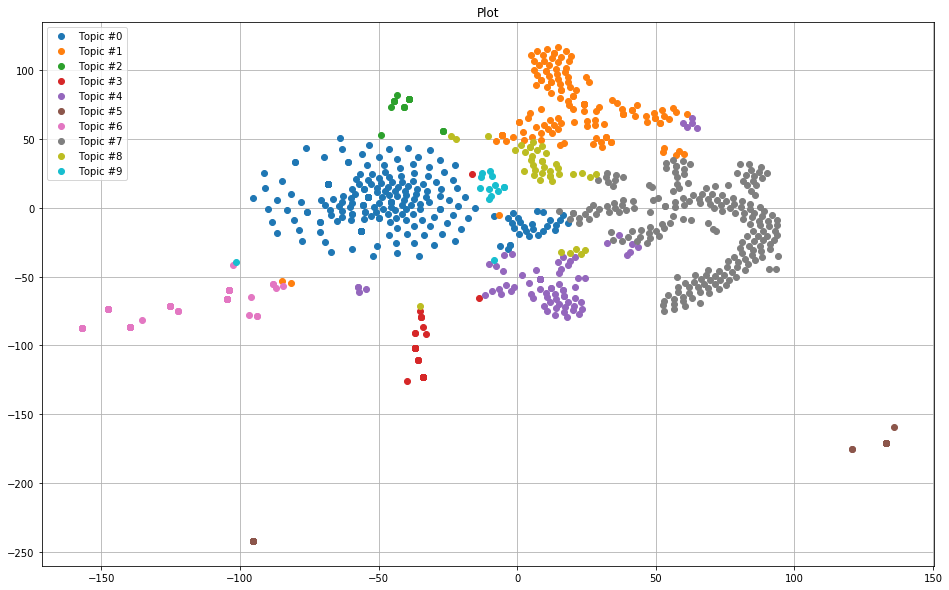

CPU times: user 12.4 s, sys: 1.32 s, total: 13.8 s
Wall time: 13.5 s


In [208]:
%%time
from sklearn.manifold import TSNE

documents_split = topic_proportions[:1000,:]

model = TSNE(n_components=2, angle = 0.99, init = 'pca', learning_rate=800)
tnse_lda = model.fit_transform(documents_split)

plt.figure(figsize=(16,10))
most_probable_topic = np.argmax(topic_proportions, axis=1)[:1000]
for t in range(10):
    plt.plot(tnse_lda[most_probable_topic==t,0], tnse_lda[most_probable_topic==t,1], 'o',
                 label="Topic #" + str(t))
plt.legend(loc='upper left')
plt.title('Plot')
plt.grid()
plt.show()
